# Bilinear interpolation

In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
%matplotlib inline
plt.style.use("seaborn-notebook")

In [3]:
def rect_grid(Lx, Ly, nx, ny):
    """Generate a structured mesh for a rectangle
    
    The rectangle has dimensions Lx by Ly, and nx nodes in x
    and ny nodes in y.
    """
    y, x = np.mgrid[-Ly/2:Ly/2:ny*1j, -Lx/2:Lx/2:nx*1j]
    els = np.zeros(((nx - 1)*(ny - 1), 4), dtype=int)
    for row in range(ny - 1):
        for col in range(nx - 1):
            cont = row*(nx - 1) + col
            els[cont, :] = [cont + row, cont + row + 1,
                              cont + row + nx + 1, cont + row + nx]
    return x.flatten(), y.flatten(), els

In [4]:
def interp_bilinear(coords, f_vals, grid=(10, 10)):
    """Bilinear interpolation for rectangular domains"""
    x_min, y_min = np.min(coords, axis=0)
    x_max, y_max = np.max(coords, axis=0)
    x, y = np.mgrid[-1:1:grid[0]*1j,-1:1:grid[1]*1j]
    N0 = (1 - x) * (1 - y)
    N1 = (1 + x) * (1 - y)
    N2 = (1 + x) * (1 + y)
    N3 = (1 - x) * (1 + y)
    interp_fun = N0 * f_vals[0] + N1 * f_vals[1] + N2 * f_vals[2] + N3 * f_vals[3]
    interp_fun = 0.25*interp_fun
    x, y = np.mgrid[x_min:x_max:grid[0]*1j, y_min:y_max:grid[1]*1j]
    return x, y, interp_fun

In [5]:
def fun(x, y):
    return y**3 +  3*y*x**2

In [6]:
x_coords, y_coords, els = rect_grid(2, 2, 4, 4)
nels = els.shape[0]
z_coords = fun(x_coords, y_coords)
z_min = np.min(z_coords)
z_max = np.max(z_coords)

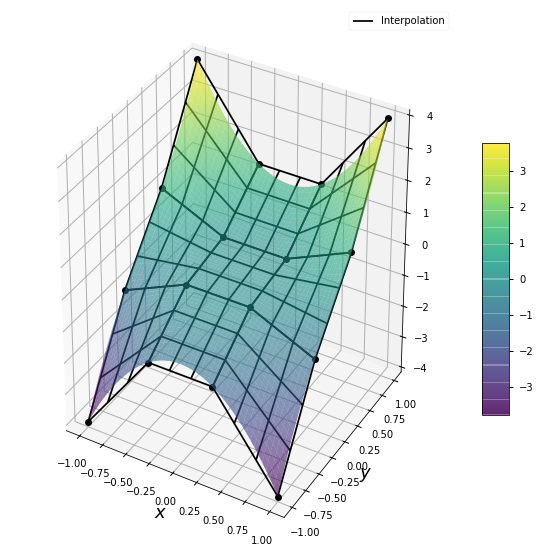

In [7]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
x, y = np.mgrid[-1:1:51j,-1:1:51j]
z = fun(x, y)
surf =ax.plot_surface(x, y, z, rstride=1, cstride=1, linewidth=0, alpha=0.6,
                      cmap="viridis")
plt.colorbar(surf, shrink=0.5, aspect=10)
ax.plot(x_coords, y_coords, z_coords, 'ok')
for k in range(nels):
    x_vals = x_coords[els[k, :]]
    y_vals = y_coords[els[k, :]]
    coords = np.column_stack([x_vals, y_vals])
    f_vals = fun(x_vals, y_vals)
    x, y, z = interp_bilinear(coords, f_vals, grid=[4, 4])
    inter = ax.plot_wireframe(x, y, z, color="black")
plt.xlabel(r"$x$", fontsize=18)
plt.ylabel(r"$y$", fontsize=18)
ax.legend([inter], ["Interpolation"])
plt.show()                 

In [8]:
from IPython.core.display import HTML
def css_styling():
    styles = open('./styles/custom_barba.css', 'r').read()
    return HTML(styles)
css_styling()